# NB: Introducting Pandas

## What is Pandas?

Pandas is a Python library design to work with dataframes.

Essentially, it adds a ton of usability features to NumPy.

It has become a standard library in data science.

## Pandas Data Frames

Just as NumPy introduces the n-dimensional array as a new data structure to Python, so Pandas introduces two:

The **Series**: a 1-dimensional labeled array capable of holding any data type.

The **DataFrame**: a 2-dimensional labeled array with columns of potentially different types. 

<div class="callout">

Note: Pandas used to have a 3-dimensional structure called a **panel**, but it has been removed from the library.
    
Ironically, the name "pandas" was partly derived the word "panel": $pan(el)-da(ta)-s$.
    
To handle higher dimensional data, the Pandas team suggests using [XArray](https://xarray.pydata.org/en/stable/), which also build on NumPy arrays.

</div>

By far, the most important data structure in Pandas is the dataframe (sometimes spelled "data frame"), with the series playing a supporting -- but crucial -- role. 

In fact, dataframe objects are built out of series objects.

So, **to understand what a dataframe is and how it behaves, you need to understand what is series is and how it is constructed.**

Before going into that, here are two quick observations about dataframes:

**First**, dataframes are **inspired by the R structure** of the same name. 

They have many similarities, but there are fundamental differences between the two that go beyond mere language differences. 

Most important is the Pandas dataframes have **indexes**, whereas R dataframes do not.

**Second**, it is helpful to think of Pandas as wrapper around NumPy and Matplotlib that makes it much easier to perform common operations, like select data by column name or visualizing plots. 

But this comes at a cost -- Pandas is slower than NumPy. 

This represents the classic trade-off between **ease-of-use** for humnas and machine **performance**.

## Series Objects

### Axis Labels (Indexes)

A series is at heart a one-dimensional array with **labels** along its axis. 

* **Labels** are essentially names that, ideally, uniquely identify each row (observation).
* It's data must be of a single type, like NumPy arrays (which they are internally).
* The axis labels are collectively referred to as the **index**.

Think of **the index as a separate data structure** that is attached to the array. 
* The array holds the data. 
* The index holds the names of the observations or things that the data are about.

Why have an index?

* Indexes provide a way to access elements of the array by name.
* They allows series objects that share index labels to be combined.
* Many other things ...

In fact, **a dataframe is a collection of series** with a common index. 

To this collection of series, the dataframe also adds a set of labels along the horizontal axis.
* The row index is **axis 0**.
* The column index is called **axis 1**.

<div class="callout">
    The row index is usually just called the index, while the column index is call the columns.
</div>

Note that both index and column labels can be **multidimensional**.
* The are called **Hierarchical Indexes** and go the technical name of `MultiIndexes`.
* As an example, consider that a table of text data might have a two-column index: `(book_id, chap_id)`
* See [the Pandas documentation](https://pandas.pydata.org/docs/user_guide/advanced.html).

It is **crucial** to understand the difference between the index of a dataframe and its data in order to understand how dataframes work.

Many a headache is caused by not understanding this difference :-)

**Indexes are powerful and controversial.**
* They allow for all kinds of magic to take place when combining and accessing data.
* But they are expensive and sometimes hard to work with (especially multiindexes).
* They are especially difficult if you are coming from R and expecting dataframes to behave a certain way.

### Some visuals to help

<img src="https://pynative.com/wp-content/uploads/2021/02/dataframe.png" width="50%" height="50%"/>

<img src="https://miro.medium.com/max/700/1*KOBhtOeFntu6CyJUsCdN0g.jpeg" width="50%" height="50%"/>

But enough introduction. 

Let's dive into how Pandas objects work in practice.

## Importing

We import pandas like this, using the alias `pd` by convention:

In [244]:
import pandas as pd

We almost always import NumPy, too, since we use many of its functions with Pandas.

In [245]:
import numpy as np

## Data Frame Constructors

There are several ways to create pandas data frames.

**Passing a dictionary of lists:**

In [246]:
df = pd.DataFrame({
    'x': [0, 2, 1, 5], 
    'y': [1, 1, 0, 0], 
    'z': [True, False, False, False]
})

In [247]:
df

,x,y,z
0,0,1,True
1,2,1,False
2,1,0,False
3,5,0,False


In [248]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [249]:
list(df.index)

[0, 1, 2, 3]

In [250]:
df.columns

Index(['x', 'y', 'z'], dtype='object')

In [251]:
list(df.columns)

['x', 'y', 'z']

In [252]:
df.values

array([[0, 1, True],
       [2, 1, False],
       [1, 0, False],
       [5, 0, False]], dtype=object)

In [253]:
type(df.values)

numpy.ndarray

**Passing the three required pieces:**
- columns as list
- index as list
- data as list of lists (2D)

In [254]:
df2 = pd.DataFrame(
    columns=['x','y'], 
    index=['row1','row2','row3'], 
    data=[[9,3],[1,2],[4,6]])

In [255]:
df2

,x,y
row1,9,3
row2,1,2
row3,4,6


**Passing a list of tuples (or list-like objects):**

In [256]:
my_data = [
    ('a', 1, True),
    ('b', 2, False)
]
df3 = pd.DataFrame(my_data, columns=['f1', 'f2', 'f3'])

In [257]:
df3

,f1,f2,f3
0,a,1,True
1,b,2,False


## Naming indexes

It is helpful to name your indexes.

In [258]:
df3.index.name = 'obs_id'

In [259]:
df3

,f1,f2,f3
obs_id,,,
0,a,1,True
1,b,2,False


## Copying DataFrames with `copy()`

Use `copy()` to give the new df a clean break from the original.  

Otherwise, the copied df will point to the same object as the original.

In [260]:
df = pd.DataFrame(
    {
        'x':[0,2,1,5], 
        'y':[1,1,0,0], 
        'z':[True,False,False,False]
    }
) 

In [261]:
df

,x,y,z
0,0,1,True
1,2,1,False
2,1,0,False
3,5,0,False


We create two copies, one "deep" and one "shallow".

In [262]:
df_deep    = df.copy()  # deep copy; changes to df will not pass through
df_shallow = df         # shallow copy; changes to df will pass through

If we alter a value in the original ...

In [263]:
df.x = 1

In [264]:
df

,x,y,z
0,1,1,True
1,1,1,False
2,1,0,False
3,1,0,False


... then the shallow copy is also changed ...

In [265]:
df_shallow

,x,y,z
0,1,1,True
1,1,1,False
2,1,0,False
3,1,0,False


... while the deep copy is not.

In [266]:
df_deep

,x,y,z
0,0,1,True
1,2,1,False
2,1,0,False
3,5,0,False


Of course, the reverse is true too -- changes to the shallow copy affect the original:

In [267]:
df_shallow.y = 99

In [268]:
df

,x,y,z
0,1,99,True
1,1,99,False
2,1,99,False
3,1,99,False


So, `df_shallow` mirrors changes to `df`, since it references its indices and data.  
`df_deep` does not reference `df`, and so changes `to` df do not impact `df_deep`.

Let's reset our dataframe.

In [269]:
df = pd.DataFrame({'x':[0,2,1,5], 'y':[1,1,0,0], 'z':[True,False,False,False]}) 

## Column Data Types

### With `.types`

In [270]:
df.dtypes

x    int64
y    int64
z     bool
dtype: object

### With `.info()`

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       4 non-null      int64
 1   y       4 non-null      int64
 2   z       4 non-null      bool 
dtypes: bool(1), int64(2)
memory usage: 200.0 bytes


## Column Renaming

Can rename one or more fields at once using a dict.  

Rename the field `z` to `is_label`:

In [272]:
df = df.rename(columns={'z': 'is_label'})

In [273]:
df

,x,y,is_label
0,0,1,True
1,2,1,False
2,1,0,False
3,5,0,False


You can also change column names this way:

In [274]:
old_cols = df.columns # Keep a copy so we can revert
df.columns = ['X','Y', 'LABEL']

In [275]:
df

,X,Y,LABEL
0,0,1,True
1,2,1,False
2,1,0,False
3,5,0,False


In [276]:
df.columns = old_cols # Reset things

## Column Referencing

Pandas supports both **bracket notation** and **dot notation**.  

**Bracket**

In [277]:
df['y']

0    1
1    1
2    0
3    0
Name: y, dtype: int64

**Dot** (i.e. as object attribute)

In [278]:
df.y

0    1
1    1
2    0
3    0
Name: y, dtype: int64

Dot notation is very convenient, since as object attributes they can be tab-completed in various editing environments.

But:
- It only works if the column names are **not reserved words**.
- It can't be used when creating a **new column** (see below).

It is convenient to names columns with a prefix, e.g. `doc_title`, `doc_year`, `doc_author`, etc. to avoid name collisions.

Column attributes and methods work with both:

In [279]:
df.y.values, df['y'].values

(array([1, 1, 0, 0]), array([1, 1, 0, 0]))

show only the first value, by indexing:

In [280]:
df.y.values[0]

1

## Column Selection

You select columns from a dataframe by passing a value or list (or any expression that evaluates to a list).

Calling a columns with a scalar returns a Series:

In [281]:
df['x']

0    0
1    2
2    1
3    5
Name: x, dtype: int64

In [282]:
type(df['x'])

pandas.core.series.Series

Calling a column with a list returns a dataframe:

In [283]:
df[['x']]

,x
0,0
1,2
2,1
3,5


In [284]:
type(df[['x']])

pandas.core.frame.DataFrame

In Pandas, we can use "fancy indexing" with labels:

In [285]:
df[['y', 'x']]

,y,x
0,1,0
1,1,2
2,0,1
3,0,5


We can put in a list comprehension, too:

In [287]:
df[[col for col in df.columns if col not in ['x','y']]]

,is_label
0,True
1,False
2,False
3,False


## Adding New Columns

It is typical to create a new column from existing columns.  

In this example, a new column (or field) is created by summing `x` and `y`:

In [290]:
df['x_plus_y'] = df.x + df.y

In [291]:
df

,x,y,is_label,x_plus_y
0,0,1,True,1
1,2,1,False,3
2,1,0,False,1
3,5,0,False,5


Note the use of bracket notation on the left.

When new columns are created, you **must** use bracket notation.

## Removing Columns with `del` and `.drop()`

### `del`

`del` can drop a DataFrame or single columns from the frame

In [292]:
df_drop = df.copy()

In [293]:
df_drop.head(2)

,x,y,is_label,x_plus_y
0,0,1,True,1
1,2,1,False,3


In [294]:
del df_drop['x']

In [295]:
df_drop

,y,is_label,x_plus_y
0,1,True,1
1,1,False,3
2,0,False,1
3,0,False,5


### `.drop()`

Can drop one or more columns.

takes `axis` parameter:
- axis=0 refers to rows  
- axis=1 refers to columns  

In [296]:
df_drop = df_drop.drop(['x_plus_y', 'is_label'], axis=1)

In [297]:
df_drop

,y
0,1
1,1
2,0
3,0


## Load Iris Dataset

Let's load a bigger data set to explore more functionality.

The function `load_dataset()` in the `seaborn` package loads the built-in dataset.

In [298]:
import seaborn as sns
iris = sns.load_dataset('iris')

Check the data type of `iris`:

In [299]:
type(iris)

pandas.core.frame.DataFrame

### See the first and last records with `.head()` and `.tail()`

In [300]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [301]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [302]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


### Inspect metadata

In [303]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

shape (rows, columns):

In [304]:
iris.shape

(150, 5)

Alternatively, `len()` returns row (record) count:

In [305]:
len(iris)

150

Column names:

In [306]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

### Get it all with `.info()`

In [307]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## The Index

In [308]:
iris.index

RangeIndex(start=0, stop=150, step=1)

We can name indexes, and it is important to do so in many cases.

In [311]:
iris.index.name = 'obs_id' # Each observation is a unique plant

In [312]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
obs_id,,,,,
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica


We can also redefine indexes to reflect **the logic of our data**.

In this data set, the species of the flower is part of its **identity**, so it can be part of the index.

The other features vary by individual. 

Note that `species` is also a label that can be used for training a model to predict the species of an iris flower. In that use case, the column would be pulled out into a separate vector.

In [313]:
iris_w_idx = iris.reset_index().set_index(['species','obs_id'])

In [314]:
iris_w_idx

sepal_length  sepal_width  petal_length  petal_width
species   obs_id                                                      
setosa    0                5.1          3.5           1.4          0.2
          1                4.9          3.0           1.4          0.2
          2                4.7          3.2           1.3          0.2
          3                4.6          3.1           1.5          0.2
          4                5.0          3.6           1.4          0.2
...                        ...          ...           ...          ...
virginica 145              6.7          3.0           5.2          2.3
          146              6.3          2.5           5.0          1.9
          147              6.5          3.0           5.2          2.0
          148              6.2          3.4           5.4          2.3
          149              5.9          3.0           5.1          1.8

[150 rows x 4 columns]

## Row Selection (Filtering) 

### `iloc[]`

You can extract rows using **indexes** with `iloc[]`. 

This fetches row 3, and all columns.

In [319]:
iris.iloc[2]

sepal_length       4.7
sepal_width        3.2
petal_length       1.3
petal_width        0.2
species         setosa
Name: 2, dtype: object

fetch rows with indices 1,2 (the right endpoint is exclusive), and all columns.

In [128]:
iris.iloc[1:3]

,sepal_length,sepal_width,petal_length,petal_width,species
obs_id,,,,,
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


fetch rows with indices 1,2 and first three columns (positions 0, 1, 2)

### Combining Filtering and Selecting

So, remember the **comma notation** from NumPy -- it is used here.

The first element is a **row selector**, the second a **column selector**.

In database terminology, row selection is called filtering.

In [129]:
iris.iloc[1:3, 0:3]

,sepal_length,sepal_width,petal_length
obs_id,,,
1,4.9,3.0,1.4
2,4.7,3.2,1.3


You can apply slices to column names too. You don't need `.iloc[]` here.

In [130]:
iris.columns[0:3]

Index(['sepal_length', 'sepal_width', 'petal_length'], dtype='object')

### `.loc[]`

Filtering can also be done with `.loc[]`. This uses the row, column labels (names).

Here we ask for rows with labels (indexes) 1-3, and it gives exactly that  
`.iloc[]` returned rows with indices 1,2.

**Author note: This is by far the more useful of the two in my experience.**

In [131]:
iris.loc[1:3]

,sepal_length,sepal_width,petal_length,petal_width,species
obs_id,,,,,
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


Note the different behavior of the slice here -- with `.loc`, `1:3` is short-hand for `[1,2,3]`.

In [320]:
iris.loc[[1,2,3]]

,sepal_length,sepal_width,petal_length,petal_width,species
obs_id,,,,,
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


So, we are not using normal slicing here:

In [329]:
iris.loc[[:-1]]

SyntaxError: invalid syntax (170941475.py, line 1)

Although this works:

In [334]:
iris.loc[:]

,sepal_length,sepal_width,petal_length,petal_width,species
obs_id,,,,,
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica


**Take-away:** Fancy indexing uses _new_ lists; you can use something like `[:-1]` because you are not referring to an existing list.

Subset on columns with column name (as a string) or list of strings

In [335]:
iris.loc[1:3, ['sepal_length','petal_width']]

,sepal_length,petal_width
obs_id,,
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2


Select all rows, specific columns

In [327]:
iris.loc[:, ['sepal_length','petal_width']]

,sepal_length,petal_width
obs_id,,
0,5.1,0.2
1,4.9,0.2
2,4.7,0.2
3,4.6,0.2
4,5.0,0.2
...,...,...
145,6.7,2.3
146,6.3,1.9
147,6.5,2.0


### `.loc[]` with MultiIndex

Recall our dataframe with a two element index:

In [341]:
iris_w_idx

sepal_length  sepal_width  petal_length  petal_width
species   obs_id                                                      
setosa    0                5.1          3.5           1.4          0.2
          1                4.9          3.0           1.4          0.2
          2                4.7          3.2           1.3          0.2
          3                4.6          3.1           1.5          0.2
          4                5.0          3.6           1.4          0.2
...                        ...          ...           ...          ...
virginica 145              6.7          3.0           5.2          2.3
          146              6.3          2.5           5.0          1.9
          147              6.5          3.0           5.2          2.0
          148              6.2          3.4           5.4          2.3
          149              5.9          3.0           5.1          1.8

[150 rows x 4 columns]

Selecting a single observation by it's key, i.e. full label:

In [347]:
iris_w_idx.loc[('setosa',0)] # df.at[r,c]

sepal_length    5.1
sepal_width     3.5
petal_length    1.4
petal_width     0.2
Name: (setosa, 0), dtype: float64

Selecting just the setosas:

In [134]:
iris_w_idx.loc['setosa']

,sepal_length,sepal_width,petal_length,petal_width
obs_id,,,,
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2


Grabbing one species and one feature:

In [414]:
iris_w_idx.loc['setosa', 'sepal_length'].head()

obs_id
0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal_length, dtype: float64

This returns a series. If we want a dataframe back, we can use `.to_frame()`:

In [354]:
iris_w_idx.loc['setosa', 'sepal_length'].to_frame().head()

,sepal_length
obs_id,
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0


We use a tuple to index multiple index levels.

Note that you can't pass slices here -- and this where indexing can get sticky.

In [355]:
iris_w_idx.loc[('setosa', 5)]

sepal_length    5.4
sepal_width     3.9
petal_length    1.7
petal_width     0.4
Name: (setosa, 5), dtype: float64

### Another Example

In [356]:
df_cat = pd.DataFrame(
    index=['burmese', 'persian', 'maine_coone'],
    columns=['x'],
    data=[2,1,3]
)

In [357]:
df_cat

,x
burmese,2
persian,1
maine_coone,3


In [358]:
df_cat.iloc[:2]

,x
burmese,2
persian,1


In [359]:
df_cat.iloc[0:1]

,x
burmese,2


In [360]:
df_cat.loc['burmese']

x    2
Name: burmese, dtype: int64

In [361]:
df_cat.loc[['burmese','maine_coone']]

,x
burmese,2
maine_coone,3


## Boolean Filtering

It's very common to subset a dataframe based on some condition on the data.

Note that even though we are filtering rows, we are not using `.loc[]` or `.iloc[]` here.

Pandas knows what to do if you pass a boolean structure.

In [362]:
iris.sepal_length >= 7.5

obs_id
0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: sepal_length, Length: 150, dtype: bool

In [363]:
iris[iris.sepal_length >= 7.5]

,sepal_length,sepal_width,petal_length,petal_width,species
obs_id,,,,,
105,7.6,3.0,6.6,2.1,virginica
117,7.7,3.8,6.7,2.2,virginica
118,7.7,2.6,6.9,2.3,virginica
122,7.7,2.8,6.7,2.0,virginica
131,7.9,3.8,6.4,2.0,virginica
135,7.7,3.0,6.1,2.3,virginica


In [365]:
iris[(iris.sepal_length >= 4.5) & (iris.sepal_length <= 4.7)]

,sepal_length,sepal_width,petal_length,petal_width,species
obs_id,,,,,
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
6,4.6,3.4,1.4,0.3,setosa
22,4.6,3.6,1.0,0.2,setosa
29,4.7,3.2,1.6,0.2,setosa
41,4.5,2.3,1.3,0.3,setosa
47,4.6,3.2,1.4,0.2,setosa


### Masking

Here's an example of **masking** using boolean conditions passed to the dataframe selector:

Here are the **values** for the feature `sepal length`:

In [366]:
iris.sepal_length.values

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

And here are **the boolean values** generated by applying a comparison operator to those values:

In [367]:
mask = iris.sepal_length >= 7.5

In [368]:
mask.values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False, False,  True, False, False, False,
       False, False,

In [372]:
mask.values.astype('int')

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

The two sets of values have the same shape.

We can now overlay the logical values over the numeric ones and keep only what is `True`:

In [369]:
iris.sepal_length[mask].values

array([7.6, 7.7, 7.7, 7.7, 7.9, 7.7])

## Working with Missing Data

Pandas primarily uses the data type `np.nan` from NumPy to represent missing data.

In [375]:
df_miss = pd.DataFrame({
    'x': [2, np.nan, 1], 
    'y': [np.nan, np.nan, 6]}
)

These values appear as `NaN`s:

In [376]:
df_miss

,x,y
0,2.0,NaN
1,NaN,NaN
2,1.0,6.0


### `.dropna()` 

This will drop all rows with missing data in any column.

[Details](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

In [377]:
df_drop_all = df_miss.dropna()
df_drop_all

,x,y
2,1.0,6.0


The `subset` parameter takes a list of column names to specify which columns should have missing values.

In [378]:
df_drop_x = df_miss.dropna(subset=['x'])
df_drop_x

,x,y
0,2.0,NaN
2,1.0,6.0


### `.fillna()`

This will replace missing values with whatever you set it to, e.g. $0$s.

We can pass the results of an operation -- for example to peform **simple imputation**, we can replace missing values in each column with the median value of the respective column:

In [379]:
df_filled = df_miss.fillna(df_miss.median())

In [380]:
df_filled

,x,y
0,2.0,6.0
1,1.5,6.0
2,1.0,6.0


## Sorting

### `.sort_values()`

Sort by values
- `by` parameter takes string or list of strings
- `ascending` takes True or False
- `inplace` will save sorted values into the df

[Details](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)

In [415]:
iris.sort_values(by=['sepal_length','petal_width'], ascending=False)

,sepal_length,sepal_width,petal_length,petal_width,species
obs_id,,,,,
131,7.9,3.8,6.4,2.0,virginica
118,7.7,2.6,6.9,2.3,virginica
135,7.7,3.0,6.1,2.3,virginica
117,7.7,3.8,6.7,2.2,virginica
122,7.7,2.8,6.7,2.0,virginica
...,...,...,...,...,...
41,4.5,2.3,1.3,0.3,setosa
8,4.4,2.9,1.4,0.2,setosa
38,4.4,3.0,1.3,0.2,setosa


### `.sort_index()`

Sort by index. Example sorts by descending index

In [382]:
iris.sort_index(axis=0, ascending=False)

,sepal_length,sepal_width,petal_length,petal_width,species
obs_id,,,,,
149,5.9,3.0,5.1,1.8,virginica
148,6.2,3.4,5.4,2.3,virginica
147,6.5,3.0,5.2,2.0,virginica
146,6.3,2.5,5.0,1.9,virginica
145,6.7,3.0,5.2,2.3,virginica
...,...,...,...,...,...
4,5.0,3.6,1.4,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


## Statistics

###  `describe()`

In [383]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [384]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [385]:
iris.species.describe()

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

In [386]:
iris.sepal_length.describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

### `value_counts()`

This is **a highly useful** function for showing the frequency for each distinct value.  

Parameters give the ability to sort by count or index, normalize, and more.  

[Details](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)

In [387]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [416]:
SPECIES = iris.species.value_counts().to_frame('n')

In [417]:
SPECIES

,n
setosa,50
versicolor,50
virginica,50


Show percentages instead of counts

In [388]:
iris.species.value_counts(normalize=True)

setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: species, dtype: float64

The methods returns a series that can be converted into a dataframe.

In [389]:
SEPAL_LENGTH = iris.sepal_length.value_counts().to_frame('n')

In [390]:
SEPAL_LENGTH.head()

,n
5.0,10
5.1,9
6.3,9
5.7,8
6.7,8


You can run `.value_counts()` on a column to get a kind of histogram:

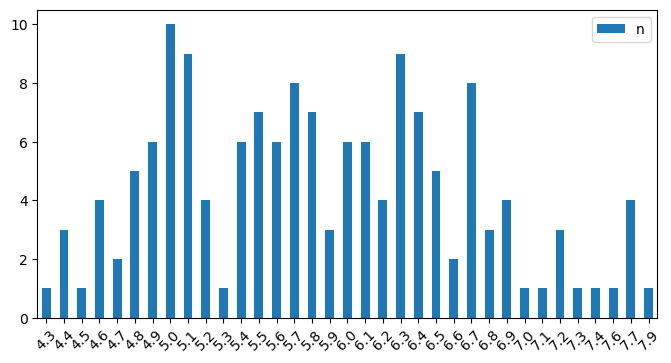

In [391]:
SEPAL_LENGTH.sort_index().plot.bar(figsize=(8,4), rot=45);

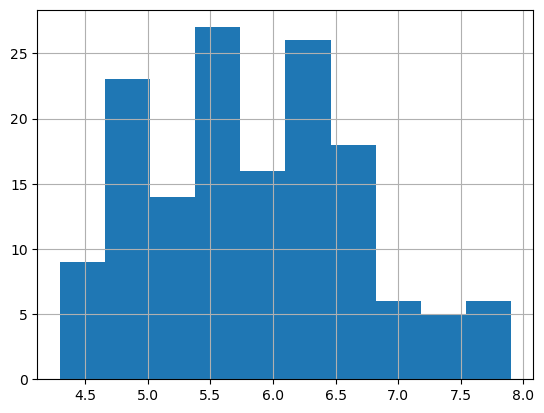

In [392]:
iris.sepal_length.hist();

### `.mean()`

Operations like this generally exclude missing data.

So, it is import to convert missing data to values if they need to be considered in the denominator.

In [393]:
iris.sepal_length.mean()

5.843333333333334

### `.max()`

In [394]:
iris.sepal_length.max()

7.9

### `.std()`

This standard deviation.

In [395]:
iris.sepal_length.std()

0.8280661279778629

### `.corr()`

In [396]:
iris.corr()

/var/folders/14/rnyfspnx2q131jp_752t9fc80000gn/T/ipykernel_1956/2141086772.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [397]:
iris.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


Correlation can be computed on two fields by subsetting on them:

In [398]:
iris[['sepal_length','petal_length']].corr()

,sepal_length,petal_length
sepal_length,1.000000,0.871754
petal_length,0.871754,1.000000


In [399]:
iris[['sepal_length','petal_length','sepal_width']].corr()

,sepal_length,petal_length,sepal_width
sepal_length,1.000000,0.871754,-0.11757
petal_length,0.871754,1.000000,-0.42844
sepal_width,-0.117570,-0.428440,1.00000


## Styling

In [425]:
iris.corr(numeric_only=True).style.background_gradient(cmap="Blues", axis=None)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [401]:
iris.corr(numeric_only=True).style.bar(axis=None)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


## Visualization

Scatterplot using Seabprn on the df columns `sepal_length`, `petal_length`.

Visualization will be covered separately in more detail.

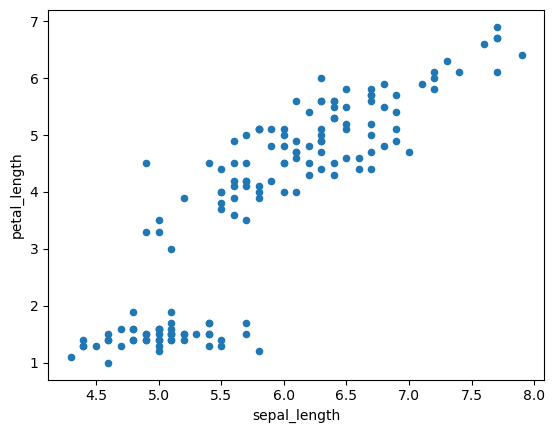

In [402]:
iris.plot.scatter('sepal_length', 'petal_length');

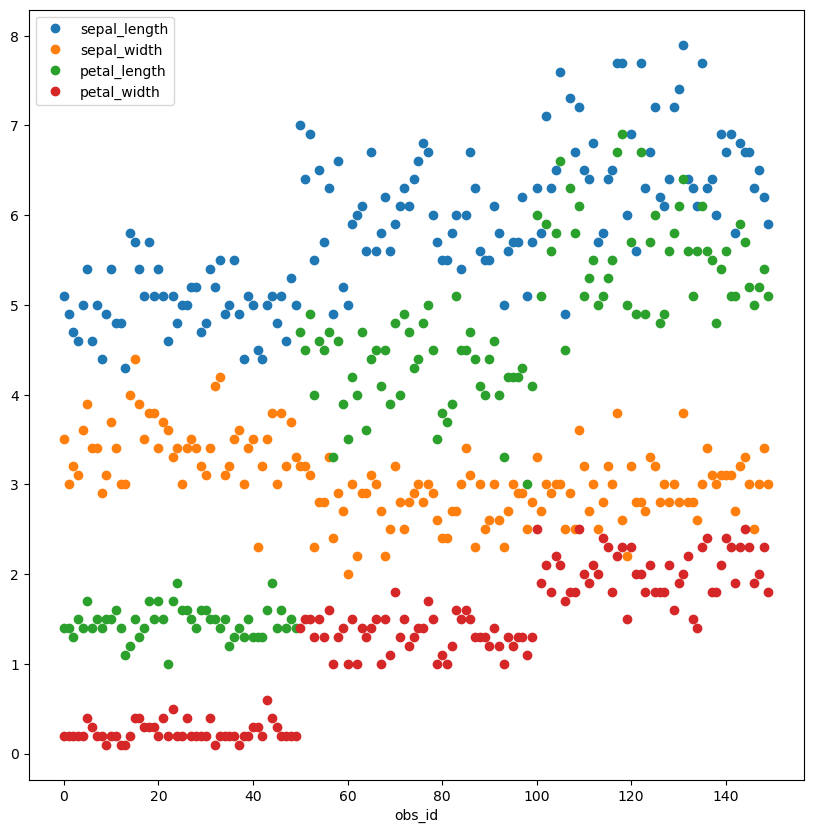

In [403]:
iris.sort_values(list(iris.columns)).plot(style='o', figsize=(10,10));

In [404]:
from pandas.plotting import scatter_matrix

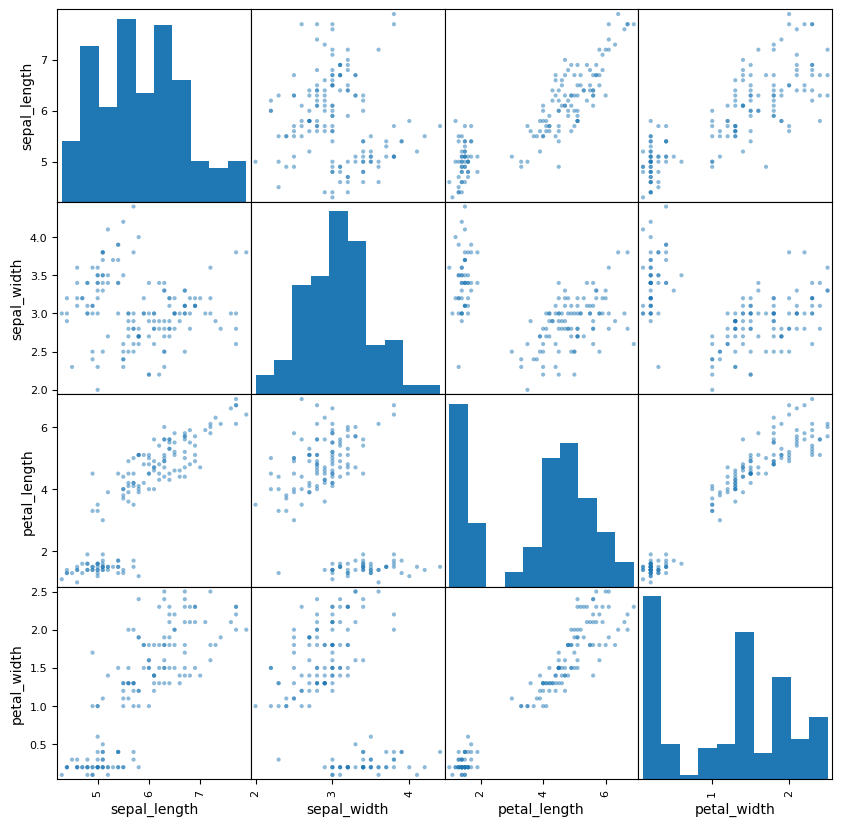

In [405]:
scatter_matrix(iris, figsize=(10,10));

## Save to CSV File

Common to save df to a csv file. The full path (path + filename) is required.  

There are also options to save to a database and to other file formats, 

Common optional parameters:
- `sep` - delimiter
- `index` - saving index column or not

[Details](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html)

In [406]:
iris.to_csv('./iris_data.csv')

## Read from CSV File

`read_csv()` reads from csv into DataFrame

takes full filepath

[Details](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [407]:
iris_loaded = pd.read_csv('./iris_data.csv').set_index('obs_id')

In [408]:
iris_loaded.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
obs_id,,,,,
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
